Load textures and cochleogram data 
---------------------------------------

In [39]:
import numpy as np
import os
npzfilename = os.path.join('guna','rawFeatures.npz')
dataraw = np.load(npzfilename) 
dataraw = dataraw['arr_0'].item()
dataraw.keys()


['Tf', 'E', 'Pf', 'Ts', 'Ps']

Plotting
---------

Activating plotting magic


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Plot one of texture features

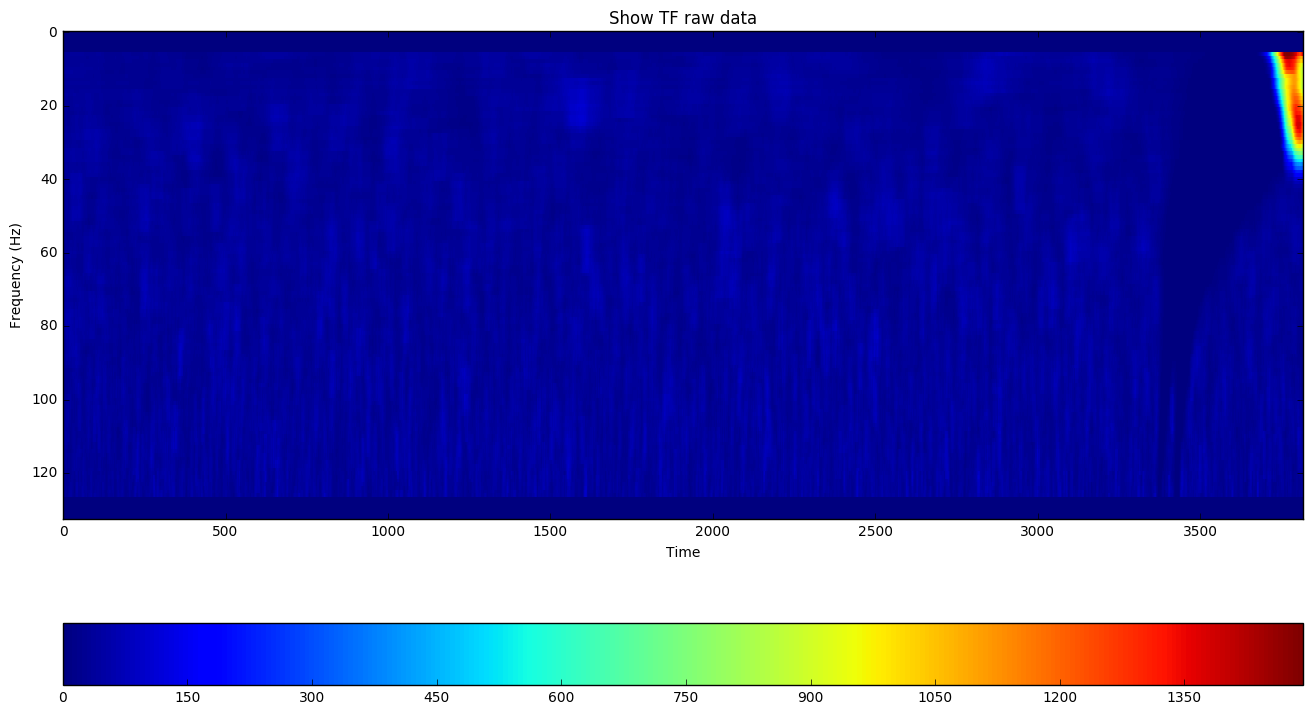

In [34]:
f=plt.figure(figsize=(16,9,))
ax = f.add_subplot(1,1,1)
txt = 'Show TF raw data'
im = ax.imshow(dataraw['Tf'], interpolation='nearest',aspect='auto')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency (Hz)')
plt.colorbar(im, orientation='horizontal')
plt.title(txt)
plt.show()

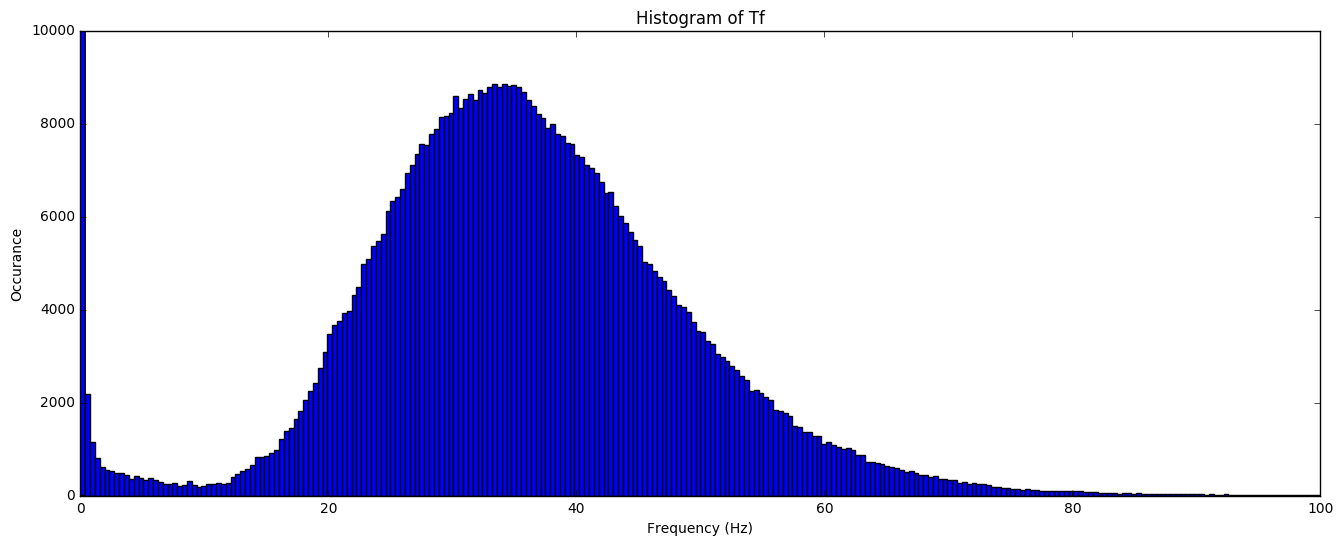

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,6,))
ax = fig.add_subplot(1,1,1)
plt.hist(dataraw['Tf'].ravel(), bins='auto', range=(0, 100))
plt.title('Histogram of Tf')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Occurance')
plt.ylim(0, 10000)
plt.show()

In [ ]:
from scipy.stats import ks_2samp
import numpy as np
from scipy import stats
# Import the os module, for the os.walk function
import os
i=1
fileArray = []
dirArray = []
#for assignment, we have to make matrix 105x105
#for test 99 files, we just make a 99x99 matrix for test
#initialize a 99x99 matrix with zeroes
ksmatrix = [[0 for one in range(99)] for two in range(99)] 
#goes through the specified directory. meaning the current one) and picks up only the files with the extension .npz
for root, dirs, files in os.walk("."):
    for dir in dirs:
        dirArray.append(dir)
    for file in files:
            if file.endswith(".npz") and not file.startswith("outputdata") and not file.startswith("AnalysisOfGygiDataset") and i<=99:
                dataraw2 = np.load(os.path.join(root, file))
                dataraw2 = dataraw2['arr_0'].item()
                #assigns in an array the dataraw for i number of sounds
                fileArray.insert(i, np.ravel(dataraw2['Tf']))
                i+=1
#the kolmogorov distance is calculated for each pair of two sounds and then it is assigned to a matrix
for k in range (0, i-1):
    for j in range (0, i-1):
        D, p = ks_2samp(fileArray[k], fileArray[j])
        ksmatrix[k][j] = (D)
        #print ('The Kolmogorov distance between '+ format(k) + ' and '+ format(j) + ' is: ' + format(D))

        
print ("Matrix of Kolmogorov distance: ")
#changes matrix to array
ksmatrix = np.squeeze(np.asarray(ksmatrix)) 
#prints KS-distance matrix
print(ksmatrix)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
import random
def kMedoids(D, k, tmax=5):
    # determine dimensions of distance matrix D
    m, n = D.shape
    # randomly initialize an array of k medoid indices
    M = np.sort(np.random.choice(n, k))
    # create a copy of the array of medoid indices
    Mnew = np.copy(M)
    # initialize a dictionary to represent clusters
    C = {}
    for t in xrange(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

#put file in the data to cluster
data = fileArray[:]
outputdata = []


#Clustering the data with the K-Medoid clustering method, devide into 2 cluster
M, C = kMedoids(ksmatrix, 2)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )
    outputdata.insert(point_idx,data[point_idx])

#save data to outputdata to save into datafile.npz to show in graph
outputdata = np.squeeze(np.asarray(outputdata))
np.savez_compressed('outputdataArray.npz', outputdata)      

#show the result
print('Clustering result:')
for label in C:
    print('\n Cluster {0}:'.format(label))
    for point_idx in C[label]:
        #show all kind of sound in each cluster
        print('\tSound: {0} \n\t {1}'.format(dirArray[point_idx+1],data[point_idx]))
        